A function that calculates memory usage 

In [2]:
import psutil

def measure_memory_usage(func):
    before_memory = psutil.virtual_memory().used / (1024 ** 2)
    result = func()
    after_memory = psutil.virtual_memory().used / (1024 ** 2)
    memory_usage = after_memory - before_memory
    print(f"Memory usage during the operation: {memory_usage:.2f} MB")
    return result

Large Dataset Scenario

In [1]:
import pandas as pd
dataset = "/kaggle/input/aug-dataset/aug_train.csv"
df = pd.read_csv(dataset)
print(df.head())
print(df.info())

       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  
3         0 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
import time

def larg_data_random_forest():
    start_time = time.time()

    # Load data
    train_data = pd.read_csv('/kaggle/input/aug-dataset/aug_train.csv')
    test_data = pd.read_csv('/kaggle/input/aug-dataset/aug_test.csv')

    # Preprocess data
    X_train = train_data.drop('Response', axis=1)
    y_train = train_data['Response']
    X_test = test_data

    # Convert categorical features to numerical
    X_train = pd.get_dummies(X_train, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

    # Handle missing values if any
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Oversample the minority class using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    # Define the Random Forest model with increased worker timeout
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, verbose=1, warm_start=True)

    # Define hyperparameters to tune
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=4, verbose=1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the model with the best hyperparameters
    best_rf_model = RandomForestClassifier(random_state=42, **best_params, n_jobs=-1, oob_score=True, verbose=1, warm_start=True)
    best_rf_model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model on the validation set
    y_val_pred = best_rf_model.predict(X_val)

    
    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_seconds = end_time - start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(elapsed_time_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format the result
    time_format = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

    # Print results
    print("Best Hyperparameters:", best_params)
    # Print classification report and confusion matrix
    print("Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    print("Time spent: {}".format(time_format))

measure_memory_usage(larg_data_random_forest)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 conc

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     63789
           1       0.68      0.52      0.59     12642

    accuracy                           0.88     76431
   macro avg       0.80      0.74      0.76     76431
weighted avg       0.87      0.88      0.87     76431

Confusion Matrix:
 [[60771  3018]
 [ 6100  6542]]
Time spent: 04:56:36
Memory usage during the operation: 2178.31 MB


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time


def larg_data_xgboost():
    start_time = time.time()


    # Load data
    train_data = pd.read_csv('/kaggle/input/aug-dataset/aug_train.csv')
    test_data = pd.read_csv('/kaggle/input/aug-dataset/aug_test.csv')

    # Preprocess data
    X_train = train_data.drop('Response', axis=1)
    y_train = train_data['Response']
    X_test = test_data

    # Convert categorical features to numerical
    X_train = pd.get_dummies(X_train, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

    # Handle missing values if any
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)

    # Rename columns to remove problematic characters
    X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
    X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Oversample the minority class using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    # Define the XGBoost model
    xgb_model = XGBClassifier(random_state=42, n_jobs=-1, verbosity=1)

    # Define hyperparameters to tune
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'min_child_weight': [1, 3, 5]
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the model with the best hyperparameters
    best_xgb_model = XGBClassifier(random_state=42, **best_params, n_jobs=-1, verbosity=1)
    best_xgb_model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model on the validation set
    y_val_pred = best_xgb_model.predict(X_val)

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_seconds = end_time - start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(elapsed_time_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format the result
    time_format = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

    # Print results
    print("Best Hyperparameters:", best_params)
    # Print classification report and confusion matrix
    print("Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    print("Time spent: {}".format(time_format))

measure_memory_usage(larg_data_xgboost)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     63789
           1       0.45      0.87      0.59     12642

    accuracy                           0.80     76431
   macro avg       0.71      0.83      0.73     76431
weighted avg       0.88      0.80      0.82     76431

Confusion Matrix:
 [[50313 13476]
 [ 1652 10990]]
Time spent: 00:35:53
Memory usage during the operation: 1451.52 MB


Outliers Scenario 

In [9]:
import pandas as pd
dataset = "/kaggle/input/outliers/train.csv"
df = pd.read_csv(dataset)
print(df.head())
print(df.info())

   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Change to regressor for continuous target
from sklearn.metrics import mean_squared_error
import time

def random_forest_outliers():
    start_time = time.time()

    # Load data
    test_data = pd.read_csv("/kaggle/input/outliers/test.csv")
    train_data = pd.read_csv("/kaggle/input/outliers/train.csv")

    # Preprocess data
    X_train = train_data.drop(['ph', 'id'], axis=1)  # Exclude 'id' and 'target' columns
    y_train = train_data['ph']
    X_test = test_data.drop('id', axis=1)  # Exclude 'id' column

    # Handle missing values if any
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define the Random Forest model with increased worker timeout
    rf_model = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, verbose=1, warm_start=True)  # Change to regressor

    # Define hyperparameters to tune
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=4, verbose=1)
    grid_search.fit(X_train, y_train)  # Use original training data without oversampling

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the model with the best hyperparameters
    best_rf_model = RandomForestRegressor(random_state=42, **best_params, n_jobs=-1, oob_score=True, verbose=1, warm_start=True)
    best_rf_model.fit(X_train, y_train)  # Use original training data without oversampling

    # Evaluate the model on the validation set
    y_val_pred = best_rf_model.predict(X_val)

    # Calculate Mean Squared Error for regression task
    mse = mean_squared_error(y_val, y_val_pred)



    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_seconds = end_time - start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(elapsed_time_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format the result
    time_format = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

    # Print results
    print("Best Hyperparameters:", best_params)
    print("Mean Squared Error on Validation Set:", mse)
    print("Time spent: {}".format(time_format))

measure_memory_usage(random_forest_outliers)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurre

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error on Validation Set: 0.33699481470526627
Time spent: 00:00:50
Memory usage during the operation: 121.76 MB


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import time

def xgboost_outliers():
    start_time = time.time()

    # Load data
    test_data = pd.read_csv("/kaggle/input/outliers/test.csv")
    train_data = pd.read_csv("/kaggle/input/outliers/train.csv")

    # Preprocess data
    X_train = train_data.drop(['ph', 'id'], axis=1)  # Exclude 'id' and 'target' columns
    y_train = train_data['ph']
    X_test = test_data.drop('id', axis=1)  # Exclude 'id' column

    # Handle missing values if any
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)

    # Rename columns to remove problematic characters
    X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
    X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define the XGBoost model
    xgb_model = XGBRegressor(random_state=42, n_jobs=-1, verbosity=1)

    # Define hyperparameters to tune
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'min_child_weight': [1, 3, 5]
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the model with the best hyperparameters
    best_xgb_model = XGBRegressor(random_state=42, **best_params, n_jobs=-1, verbosity=1)
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = best_xgb_model.predict(X_val)

    # Calculate Mean Squared Error for regression task
    mse = mean_squared_error(y_val, y_val_pred)

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_seconds = end_time - start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(elapsed_time_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format the result
    time_format = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))
    # Print the result
    print("Best Hyperparameters:", best_params)
    print("Mean Squared Error on Validation Set:", mse)
    print("Time spent: {}".format(time_format))
    
measure_memory_usage(xgboost_outliers)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set: 0.29701422936509064
Time spent: 00:00:18
Memory usage during the operation: 10.30 MB


Varying degrees of dimensionality Scenario

In [3]:
import pandas as pd
import numpy as np
from scipy import stats


# Load the dataset
dataset = "/kaggle/input/varying-degrees-of-dimensionality/EmpiricalDivGradients.csv"
df = pd.read_csv(dataset)
df.head()
df.info()
# List of columns to plot
columns = ['cell', 'longitude', 'latitude', 'richness', 'phylo.dist', 'phylo.SC', 'phylo.SV', 'morpho.MNND', 'morpho.volume', 'morpho.SD.MSTD', 'funct.rich', 'funct.even', 'funct.div']

# Remove NaN values
df = df.dropna(subset=columns)

# Remove outliers using the z-score method

z_scores = np.abs(stats.zscore(df[columns]))
threshold = 3
outliers = (z_scores > threshold).all(axis=1)

df = df[~outliers]

# Print info of the new data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cell            2082 non-null   int64  
 1   longitude       2082 non-null   float64
 2   latitude        2082 non-null   float64
 3   richness        2082 non-null   int64  
 4   phylo.dist      1940 non-null   float64
 5   phylo.SC        1940 non-null   float64
 6   phylo.SV        1940 non-null   float64
 7   morpho.MNND     1940 non-null   float64
 8   morpho.volume   1940 non-null   float64
 9   morpho.SD.MSTD  1940 non-null   float64
 10  funct.rich      1940 non-null   float64
 11  funct.even      1940 non-null   float64
 12  funct.div       1940 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 211.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1940 entries, 18 to 2081
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------      

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Dimensionality: 1, Mean Squared Error: 18.171161791237115
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Dimensionality: 2, Mean Squared Error: 8.404421005154639
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Dimensionality: 3, Mean Squared Error: 7.809713595360824
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Dimensionality: 4, Mean Squared Error: 5.695876288659908e-05
Fitting 5 folds

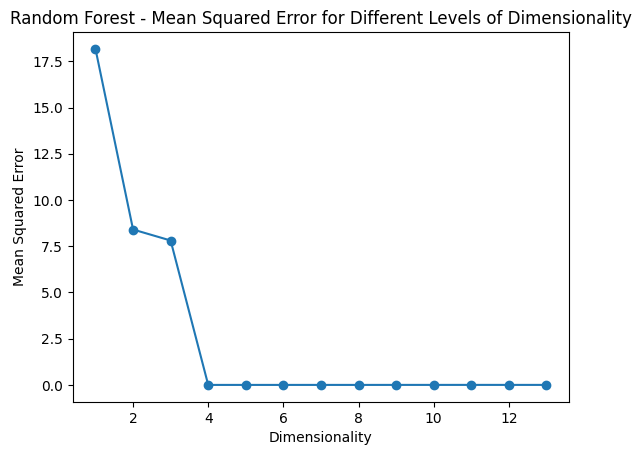

Final Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Time spent: 00:12:05
Memory usage during the operation: 511.30 MB


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

def random_forest_varying_degrees_of_dimensionality():
    start_time = time.time()

    # Load the dataset
    dataset = "/kaggle/input/varying-degrees-of-dimensionality/EmpiricalDivGradients.csv"
    df = pd.read_csv(dataset)

    # List of columns to plot
    columns = ['cell', 'longitude', 'latitude', 'richness', 'phylo.dist', 'phylo.SC', 'phylo.SV', 'morpho.MNND', 'morpho.volume', 'morpho.SD.MSTD', 'funct.rich', 'funct.even', 'funct.div']

    # Remove NaN values
    df = df.dropna(subset=columns)

    # Remove outliers using the z-score method
    from scipy import stats

    z_scores = np.abs(stats.zscore(df[columns]))
    threshold = 3
    outliers = (z_scores > threshold).all(axis=1)

    df = df[~outliers]

    # Choose a target variable
    target_variable = 'richness'

    # Lists to store MSE values
    mse_values_rf = []

    # Varying degrees of dimensionality
    for i in range(1, len(columns) + 1):
        # Select the first i columns
        selected_columns = columns[:i]

        # Prepare data
        X = df[selected_columns]
        y = df[target_variable]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define the Random Forest model
        rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

        # Define hyperparameters to tune
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        # Use GridSearchCV for hyperparameter tuning
        grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
        grid_search_rf.fit(X_train, y_train)

        # Get the best hyperparameters
        best_params = grid_search_rf.best_params_

        # Train the model with the best hyperparameters
        best_rf_model = RandomForestRegressor(random_state=42, **best_params, n_jobs=-1)
        best_rf_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred_rf = best_rf_model.predict(X_test)

        # Calculate Mean Squared Error as a metric for evaluation
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        mse_values_rf.append(mse_rf)

        print("Best Hyperparameters:", best_params)
        # Print the MSE for each level of dimensionality
        print(f"Random Forest - Dimensionality: {i}, Mean Squared Error: {mse_rf}")

    # Plotting the MSE values for Random Forest
    plt.plot(range(1, len(columns) + 1), mse_values_rf, marker='o')
    plt.title('Random Forest - Mean Squared Error for Different Levels of Dimensionality')
    plt.xlabel('Dimensionality')
    plt.ylabel('Mean Squared Error')
    plt.show()

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_seconds = end_time - start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(elapsed_time_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format the result
    time_format = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

    # Print results
    print("Final Best Hyperparameters:", best_params)
    print("Time spent: {}".format(time_format))

measure_memory_usage(random_forest_varying_degrees_of_dimensionality)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Dimensionality: 1, Mean Squared Error: 46.87285663146113
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Dimensionality: 2, Mean Squared Error: 5.211995167041503
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Dimensionality: 3, Mean Squared Error: 5.088915355330865
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Dimensionality: 4, Mean Squared Error: 3.880942683829829e-08
Fitting 5 folds for each

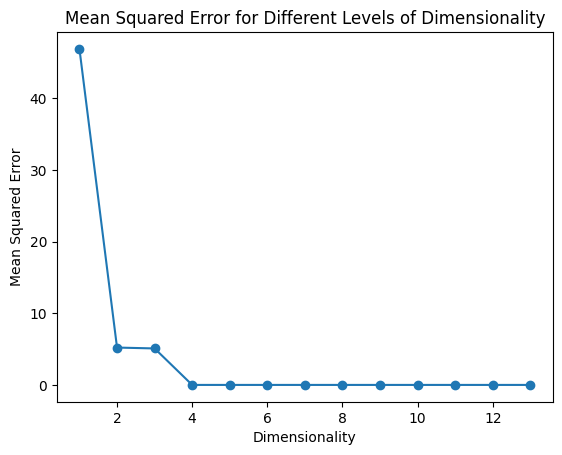

Final Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Time spent: 00:05:15
Memory usage during the operation: 491.01 MB


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

def xgboost_varying_degrees_of_dimensionality():
    start_time = time.time()

    # Load the dataset
    dataset = "/kaggle/input/varying-degrees-of-dimensionality/EmpiricalDivGradients.csv"
    df = pd.read_csv(dataset)

    # List of columns to plot
    columns = ['cell', 'longitude', 'latitude', 'richness', 'phylo.dist', 'phylo.SC', 'phylo.SV', 'morpho.MNND', 'morpho.volume', 'morpho.SD.MSTD', 'funct.rich', 'funct.even', 'funct.div']

    # Remove NaN values
    df = df.dropna(subset=columns)

    # Remove outliers using the z-score method
    from scipy import stats

    z_scores = np.abs(stats.zscore(df[columns]))
    threshold = 3
    outliers = (z_scores > threshold).all(axis=1)

    df = df[~outliers]

    # Choose a target variable (e.g., 'richness' for demonstration purposes)
    target_variable = 'richness'

    # Lists to store MSE values
    mse_values = []

    # Varying degrees of dimensionality
    for i in range(1, len(columns) + 1):
        # Select the first i columns
        selected_columns = columns[:i]

        # Prepare data
        X = df[selected_columns]
        y = df[target_variable]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define the XGBoost model
        xgb_model = XGBRegressor(random_state=42, n_jobs=-1, verbosity=1)

        # Define hyperparameters to tune
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0],
            'min_child_weight': [1, 3, 5]
        }

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_params = grid_search.best_params_

        # Train the model with the best hyperparameters
        best_xgb_model = XGBRegressor(random_state=42, **best_params, n_jobs=-1, verbosity=1)
        best_xgb_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = best_xgb_model.predict(X_test)

        # Calculate Mean Squared Error as a metric for evaluation
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)

        print("Best Hyperparameters:", best_params)
        # Print the MSE for each level of dimensionality
        print(f"Dimensionality: {i}, Mean Squared Error: {mse}")

    # Plotting the MSE values
    plt.plot(range(1, len(columns) + 1), mse_values, marker='o')
    plt.title('Mean Squared Error for Different Levels of Dimensionality')
    plt.xlabel('Dimensionality')
    plt.ylabel('Mean Squared Error')
    plt.show()

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time_seconds = end_time - start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(elapsed_time_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format the result
    time_format = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

    # Print results
    print("Final Best Hyperparameters:", best_params)
    print("Time spent: {}".format(time_format))

measure_memory_usage(xgboost_varying_degrees_of_dimensionality)